## Introduction

The purpose of this project is to test whether the creative Ad strategy can brings significant user engagement comparing with the dummy Ad.

### Business Problem

An advertising company has created a new advertising strategy to increase the number of users of a platform. The company carries out an experimental method by giving creative advertisements to several customers and comparing them with the results of old or dummy advertisements that were also given to other customers. The company wants the data team to identify the most optimal advertising strategy by analyze the comparison of the results obtained. Does the creative ad increase the number of customer responses? Are there any significant differences? Can the creative advertising be used and give benefit to the company?

### Columns Description

- `auction_id`: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

- `experiment`: which group the user belongs to - control or exposed.

- `control`: users who have been shown a dummy ad

- `exposed`: users who have been shown a creative, an online interactive ad, with the SmartAd brand.

- `date`: the date in YYYY-MM-DD format

- `hour`: the hour of the day in HH format.

- `device_make`: the name of the type of device the user has e.g. Samsung

- `platform_os`: the id of the OS the user has.

- `browser`: the name of the browser the user uses to see the BIO questionnaire.

- `yes`: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

- `no`: 1 if the user chooses the “No” radio button for the BIO questionnaire.

### Experiment Approach

**Null Hypothesis** Hₒ: p = pₒ "There is no significant difference between the ad success rate of both groups"

**Alternative Hypothesis** Hₐ: p ≠ pₒ "There is significant difference between the ad success rate of both groups"

**Confidence Level**: 95% (α=0.05)

## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/AdSmartABdata.csv")
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


#### Change data type format

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


Changing the format according to the data type will be easier to read and analyze at the later stage.

#### Checking for nulls value

In [5]:
# Check for NULLS value
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

Fortunately, the dataset seems doesn't have null values.

#### Checking for duplicate value

In [6]:
df.duplicated().sum()

0

We have no duplicate values

#### Remove non-answer observations

Remove non-answer observations (both 'yes' and 'no' columns are equal to 0). This may remove a significant percentage of the observations, but non-answers are not useful for our analysis as we can not infer if the ad was successful or not.

In [7]:
#Checking for non answer
df_no_ans = df[(df['yes'] == 0) & (df['no'] == 0)]
df_no_ans

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


There are 6834 users that were not interacting with the ad, neither clicked the 'yes' button nor the 'no' button.

In [8]:
#Removing non answer
ABdata = df.drop(df_no_ans.index)
ABdata.shape

(1243, 9)

After we filter out the non answer users, now we have 1243 users that we're going to use for further analysis.

In [9]:
ABdata.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [10]:
ABdata.describe()

,hour,platform_os,yes,no
count,1243.000000,1243.000000,1243.000000,1243.000000
mean,11.520515,5.986323,0.460177,0.539823
std,5.765704,0.116191,0.498612,0.498612
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,1.000000
75%,15.000000,6.000000,1.000000,1.000000
max,23.000000,6.000000,1.000000,1.000000


## Exploratory Data Analysis

### Experiment Time by Date

In [11]:
# Total impressions by date
ABdata_dates = ABdata.groupby('date')['date'].count()
ABdata_dates

date
2020-07-03    325
2020-07-04    159
2020-07-05    117
2020-07-06     74
2020-07-07     83
2020-07-08    177
2020-07-09    184
2020-07-10    124
Name: date, dtype: int64

Text(0.5, 0, 'Day')

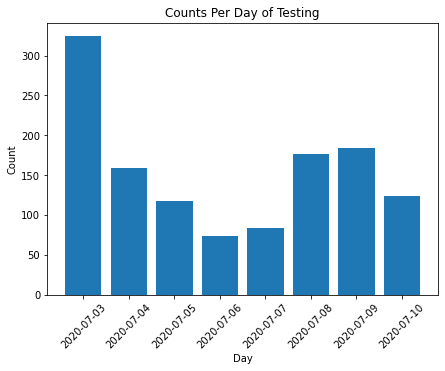

In [12]:
# Visualization total impressions by date 
ABdata_dates = {'Date': ['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
           'Counts': [325, 159, 117, 74, 83, 177, 184, 124]}

fig, ax = plt.subplots(figsize=(7,5))

plt.bar(ABdata_dates['Date'], ABdata_dates['Counts'])
plt.xticks(rotation=45)
plt.title('Counts Per Day of Testing')
plt.ylabel('Count')
plt.xlabel('Day')

**Conclusions**
- The experiment was conducted from July 3 to July 10, 2020 (Friday to Friday).
- The first day of experiment on Friday, July 3rd, 2020 got 325 total impressions and also the highest total impressions among the experiment time.
- Monday, July 06th, 2020 is the day with the less total impressions with 74 impressions.
- The last day on Friday, July 10th, 2020 got 124 total impressions.

### Experiment Time by Hour

In [13]:
# Total impressions by hour
ABdata_hour = ABdata.groupby('hour')['hour'].count()
print(ABdata_hour)
print('Mean over 24 hours =', ABdata_hour.mean())

hour
0      31
1      32
2      33
3      44
4      46
5      49
6      50
7      59
8      67
9      57
10     57
11     44
12     42
13     41
14     51
15    281
16     44
17     34
18     38
19     38
20     45
21     34
22     21
23      5
Name: hour, dtype: int64
Mean over 24 hours = 51.791666666666664


Text(0, 0.5, 'Proportion')

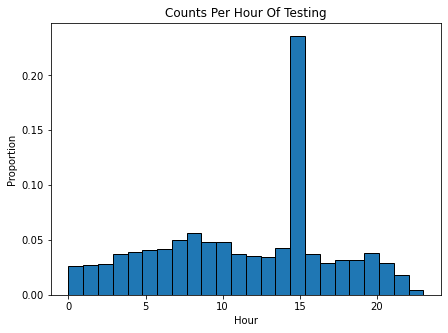

In [14]:
# Visualization total impressions by hour
ABdata_hour = ABdata['hour']

fig, ax = plt.subplots(figsize=(7,5))

ABdata_hour.plot(kind='hist',
                 density=True,
                 edgecolor='black',
                 bins=24)
plt.title('Counts Per Hour Of Testing')
plt.xlabel('Hour')
plt.ylabel('Proportion')

**Conclusions**
- At hour 15, 281 impressions were collected. It was the time when the ad got the most total impressions
- The average number of impressions in 24 hours is 52 impressions.

### Users based on experiment group

exposed    657
control    586
Name: experiment, dtype: int64


<AxesSubplot:ylabel='experiment'>

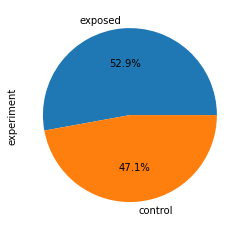

In [15]:
#Total sample users based on experiment
print(ABdata['experiment'].value_counts())
ABdata['experiment'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False)

In [16]:
#Groupby with experiment
expmnt = ABdata.groupby(['experiment']).sum()
expmnt

,hour,platform_os,yes,no
experiment,,,,
control,7282,3503,264,322
exposed,7038,3938,308,349


In [17]:
import seaborn as sns

Text(0.5, 1.0, '"Yes" and "No" based on experiment')

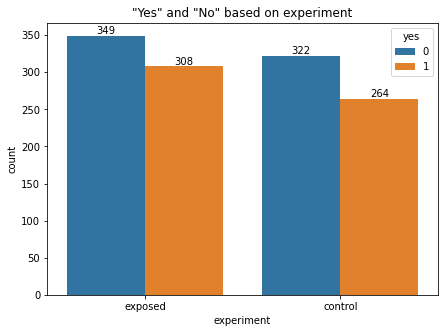

In [18]:
#"Yes" and "No" based on experiment
fig, ax = plt.subplots(figsize=(7,5))


ax = sns.countplot(x='experiment', hue='yes', data=ABdata)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

ax.set_title('"Yes" and "No" based on experiment')


In [19]:
# Creating dfs for each group
total_control = ABdata.experiment.value_counts().control
total_exposed = ABdata.experiment.value_counts().exposed
yes_control = expmnt.yes.control
yes_exposed = expmnt.yes.exposed

# Computing mean (as success == 1 and failure == 0 the mean is effectively our success rate)
rate_control = (yes_control/total_control)
rate_exposed = (yes_exposed/total_exposed)

print(rate_control)
print(rate_exposed)

0.45051194539249145
0.4687975646879756


**Conclusions**
- The total sample of experiment users in the exposed group was 657 users with 52.9%, while in the control group, there were 586 users with 47.1%.
- Total Percentage of Ad Success Control group was 45.05%.
- Total Percentage of Ad Success Exposed group was 46.88%.
- Ad success in the exposed group was higher by approximately 1.83 percentage.

## A/B Testing

In [20]:
from scipy.stats import norm
import numpy as np

In [21]:
#Significance Level
alpha = 0.05

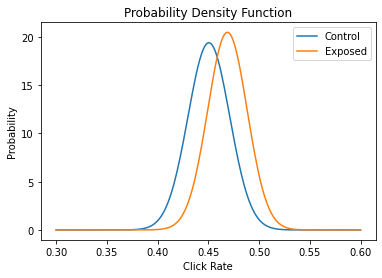

In [22]:
#Standard Deviation Calculation
std_control = np.sqrt(rate_control * (1 - rate_control) / total_control)
std_exposed = np.sqrt(rate_exposed * (1 - rate_exposed) / total_exposed)

#Generating Click Rate Values
click_rate = np.linspace(0.30, 0.60, 200)

#Probability Density Function (PDF) Calculation
prob_control = norm(rate_control, std_control).pdf(click_rate)
prob_exposed = norm(rate_exposed, std_exposed).pdf(click_rate)

#Visualization
plt.plot(click_rate, prob_control, label='Control')
plt.plot(click_rate, prob_exposed, label='Exposed')

plt.legend()
plt.title("Probability Density Function")
plt.xlabel("Click Rate")
plt.ylabel("Probability")
plt.show()


In [23]:
#Z-score calculation
z_score = (rate_exposed-rate_control)/np.sqrt(std_control**2+std_exposed**2)
print(z_score)


0.6458981015684259


In [24]:
#P-value calculation
p= 1-norm().cdf(z_score)
p

0.2591726745827285

In [25]:
if p > alpha:
    print(f'P-Value: {round(p,4)} > Alpha: {alpha} \nDecision: Can not reject the null hypothesis')
else:
    print(f'P-Value: {round(p,4)} < Alpha: {alpha} \nDecision: Reject the null hypothesis')

P-Value: 0.2592 > Alpha: 0.05 
Decision: Can not reject the null hypothesis


**Statistical Conclusion**

p-value = 0.2592 and alpha = 0.05

p-value > alpha

p-value higher than alpha, we ***can not reject the Null hypothesis*** and conclude that there is no statistically significant difference between the two groups of Ad A and Ad B

**Additional Conclusion**

There were many unanswered observations that we removed from the dataset. The observations with no answers (both 'yes' and 'no' columns == 0) are removed with total 6834 or 84.61% observations from total 8077 observations. So we only left with 1243 observations. This significant loss of data causes a lack of observations to ensure that significant differences are detected.

### Business Conclusion

These findings indicate that the differences between the 'dummy ad' shown to the 'control' group, and the 'creative ad' shown to the 'exposed' group do not convert into better ad performance. These findings indicate that there is no solid business reason to push the implementation of the new ad design over the old one, as it will yield no extra benefit.